<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD23_Activation_Function(220817).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차

1. 활성화 함수
- 활성화 함수
- 퍼셉트론
  - 신경세포의 구조
  
  - 퍼셉트론의 구조

2.선형과 비선형
- 선형
- 비선형
- 비선형 함수를 쓰는 이유
  - 그렇다면..(비선형 함수를 쓴다면?)

3. 활성화 함수의 종류
- 이진 계단 함수
  - 이진 계단 함수의 한계
- 선형 활성화 함수
  - 선형 활성화 함수의 한계
- 비선형 활성화 함수
  - 시그모이드/로지스틱
  - 하이퍼볼릭 탄젠트
  - ReLU
  - ReLU의 단점을 극복하기 위한 시도들

끝으로...

In [ ]:
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product # 순열, 조합, product를 구현하거나 사용할 때 사용하는 라이브러리
import tensorflow as tf

tf.random.set_seed(7879)

# 23-2. 활성화 함수

 ##### 활성화란?
 - 특정 조건'이 만족되어 나타나는 것

 ##### 활성화 함수를 쓰는 결정적인 이유
 - 딥러닝 모델의 표현력을 향상시켜주기 위해서 즉, 모델의 representation capacity 또는 expressivity를 향상시킨다라고도 말합니다.

 ##### 활성화 함수는 모델의 표현력을 향상시켜주는 이유

만일 어떤 모델이 w_1, ~b_1w 
1
​
 , b 
1
​
  이라는 2개의 parameter로 이루어진 다음과 같은 모델이라고 해보겠습니다.

f(x)=xw_1+b_1f(x)=xw 
1
​
 +b 
1
​
 

그런데 이 모델로 x^2x 
2
 , x^5x 
5
 , sin(x)sin(x) 등으로 표현되는 데이터를 학습할 수 있을까요? 답은 "그럴 수 없다" 입니다. 왜냐하면 w_1,~b_1w 
1
​
 , b 
1
​
  값을 아무리 바꿔도 x^2x 
2
 , x^5x 
5
 , sin(x)sin(x) 와 같은 함수는 절대 표현할 수 없기 때문이죠. 이를 수학적으로 말하면, '"선형" 함수(직선)로는 "비선형"함수(사인곡선 or x^5x 
5
 와 같은 고차항)를 표현할 수 없다'라고 말합니다.

그런데 잘 생각해 보시면 딥러닝 모델의 parameter(w,~bw, b)들은 입력값 xx와 선형 관계입니다. 왜냐하면 xw+bxw+b의 형태로 표현되어서, 즉 곱하고 더하는 연산만 하면서 그다음 layer로 전달하기 때문이죠. 그리고 아무리 많은 layer들을 겹쳐도 역시 그 결과는 선형 관계입니다. 따라서 사인 곡선처럼 직선으로는 근사 시킬 수 없는 (혹은 고양이나 강아지 사진처럼 무수히 많고 복잡한 특징들을 가진) 비선형 데이터를 표현하려면 딥러닝 모델도 비선형성을 지니고 있어야 합니다. 이때 쓰인 것이 바로 활성화 함수이고, 이 활성화 함수를 layer 사이사이에 넣어줌으로써 모델이 비선형 데이터도 표현할 수 있게 되었습니다. 이 부분은 중요한 부분이니 세부 노드에서 더 상세히 다루어보겠습니다. 😉

마지막으로 활성화 함수에는 하이퍼볼릭 탄젠트(tanh), 시그모이드(sigmoid), Softmax, ReLU 등등 많은 함수들이 있는데요. 활성화 함수들이 가지는 특징들은 어떤 것이 있는지도 알아보겠습니다.


# 시그모이드 함수

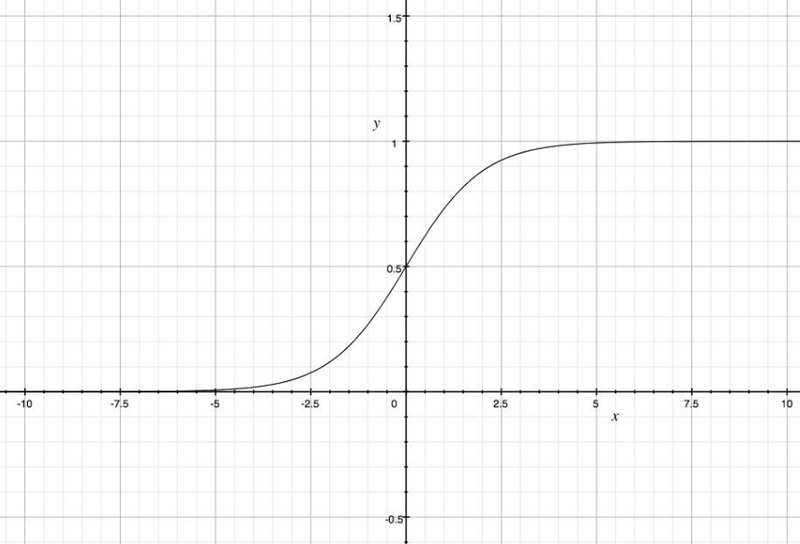

- 범위 : 0 <= 출력값 <= 1
- 활성화 조건 : 시그모이드가 0 이상일때
- 비활성화 조건 : 시그모이드가 0 보다 작을때

# 23-3. 퍼셉트론
- 딥러닝 모델을 이루는 각각의 노드를 퍼셉트론이라고한다.

- 퍼셉트론이 쌓이면 단층 퍼셉트론이되고 이런 단층 퍼셉트론이 쌓이면 다층 퍼셉트론이된다.

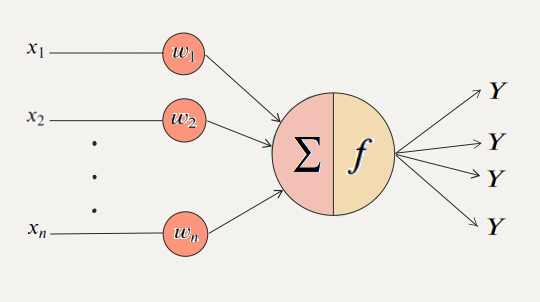

# 23-4. 선형과 비선형

##### 선형 변환 정의

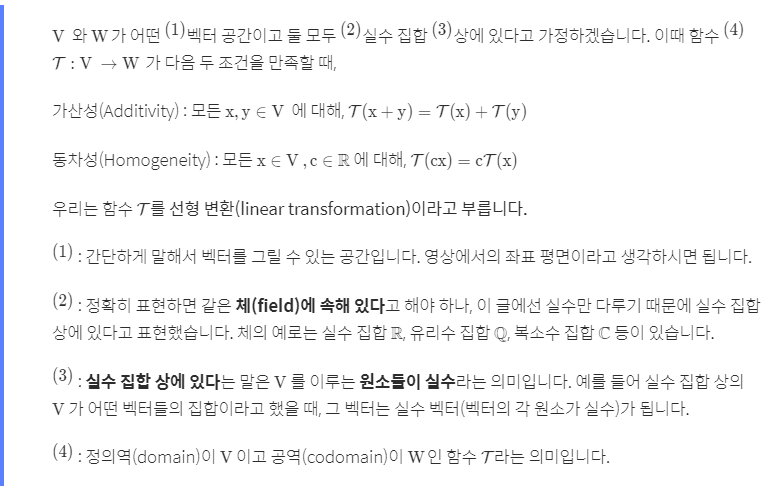

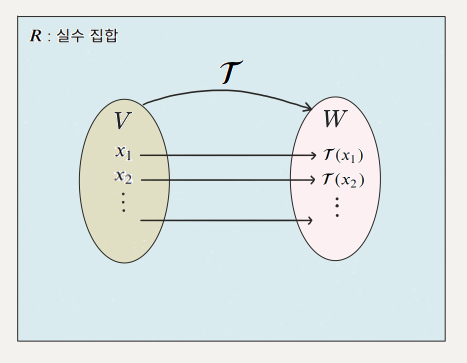






# 23-5. 비선형 함수를 쓰는 이유 (1)

##### 왜 선형 함수를 사용하면 표현력이 떨어지는가?
- 선형 활성화 함수를 사용한다면, 노드의 개수를 아무리 많이 붙여도 결국 하나의 노드를 사용하는것과 차이가 없다.

# 23-6. 비선형 함수를 쓰는 이유 (2)

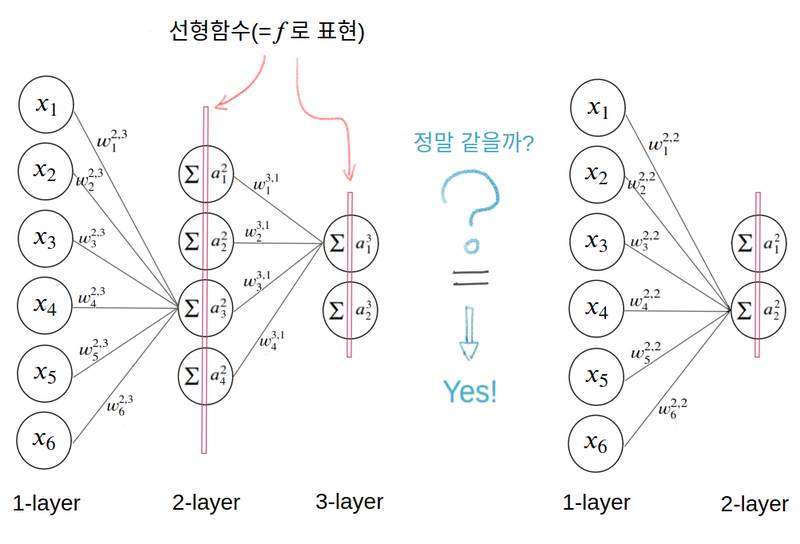

# 23-7. 활성화 함수의 종류 (1) 이진 계단 함수

- 이 함수로 들어온 입력이 특정 임계점을 넘으면 1(혹은 True)를 출력하고 그렇지 않을 때는 0을 출력

In [ ]:
# 이진 계단 함수 구현
def binary_step(x, threshold=0):
  # threshold가 있는 함수를 쓰면 꼭 default 값을 설정해주세요
  return 0 if x < threshold else 1

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

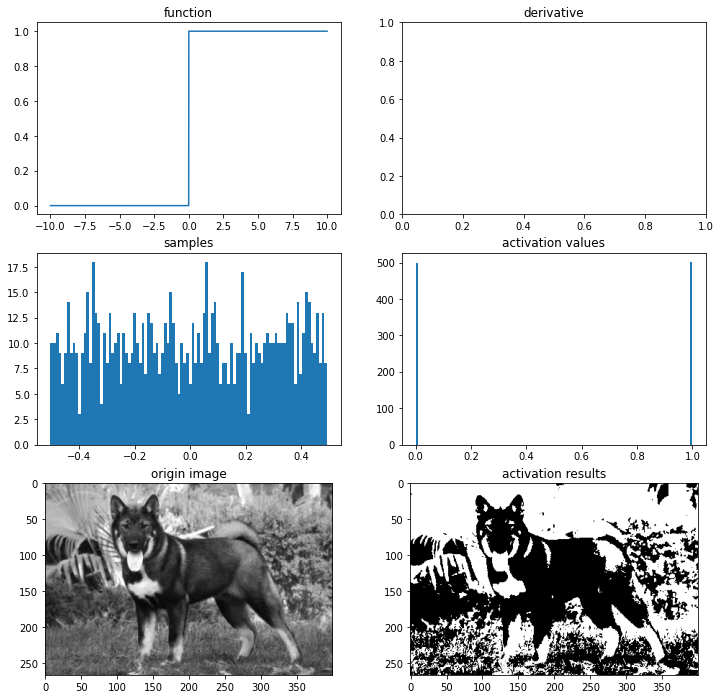

In [ ]:
#  이미지 불러오기
img_path = '/content/dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

In [ ]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

In [ ]:
# 
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

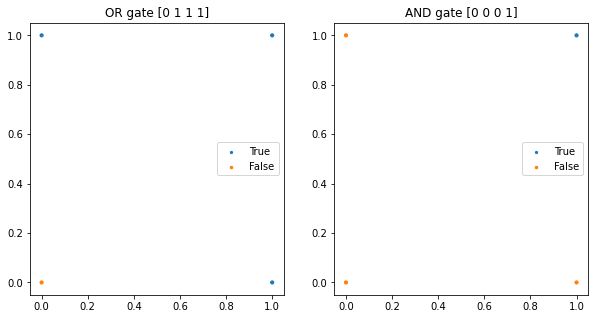

In [ ]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X]) 
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [ ]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# OR 게이트와 AND 게이트를 구현한 단층 퍼셉트론 모델의 정확도가 1.0으로 기록됨.


999th epoch, accuracy : 1.0
(array([0.00513622, 0.0043539 ]), array([-0.00210897]))
999th epoch, accuracy : 1.0
(array([0.01184668, 0.01540143]), array([-0.02447766]))


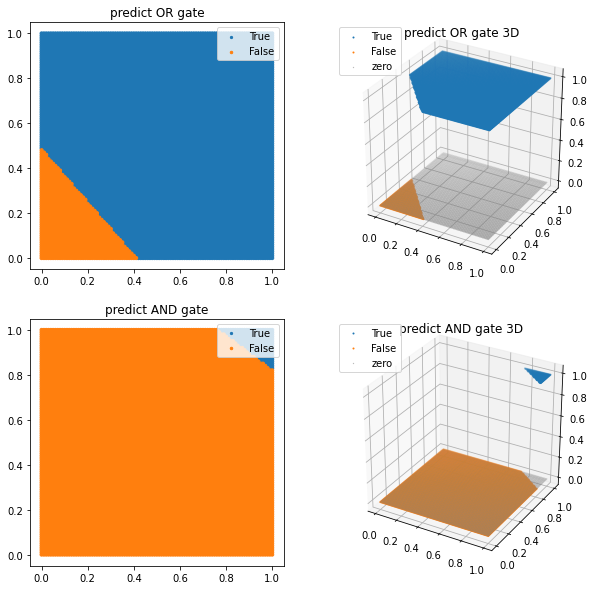

In [ ]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

# 훈련을 할때마다 그래프 모양이 다르게 나올것이다.
# OR gate와 AND gate의 accuracy를 1.0으로 만드는 퍼셉트론의 최적 가중치 값은 하나로 정해져 있지 않으므로, 따라서 이 가중치에 의해 결정되는 그래프의 모양도 계속 달라집니다.

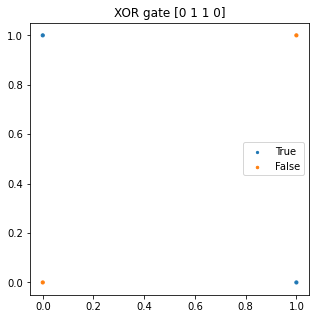

In [ ]:
# 이진 계단 함수의 한계
# XOR 게이트 구현

threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1^ x2 for x1, x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

999th epoch, accuracy : 0.25
(array([-0.02088834, -0.01991745]), array([0.01843976]))


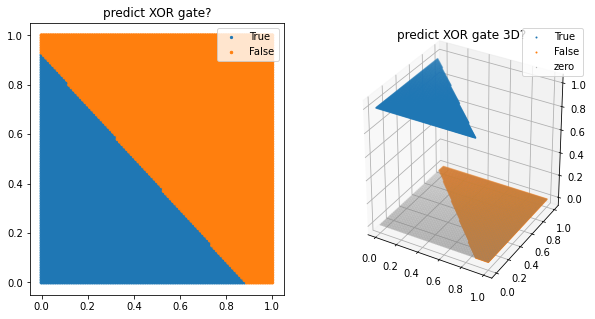

In [ ]:
# # XOR gate가 풀릴까?
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()

# 단층 퍼셉트론으로 XOR을 구현할수없기 때문에 다층 퍼셉트론으로 구현을 한다.

In [ ]:
# 이진 계단 함수의 한계 2

# 역전파 알고리즘을 사용할 수 없다.
# 이진 계단 함수는 0에서는 미분이 안 될뿐더러 0인 부분을 제외하고 미분을 한다고 해도 미분 값이 전부 0이 나옵니다.
# 때문에 역전파에서 가중치들이 업데이트되지 않는다.

# 또한 다중 출력은 할 수 없다. 이진 계단 함수는 출력을 1 or 0으로 밖에 주지 못하기 때문에 다양한 클래스를 구분해야 하는 문제는 해결할 수 없다.

[이진 계단함수 참고 문헌](https://en.wikipedia.org/wiki/Perceptron)

# 23-8. 활성화 함수의 종류 (2) 선형 활성화 함수

- 선형 활성화 함수를 사용한 모델은 이진 계단 함수를 사용한 모델과 다르게 다중 출력이 가능합니다. 때문에 이진 분류는 물론이고 간단한 다중 분류 문제까지도 해결할 수 있습니다.

- 또한 미분이 가능해서 역전파 알고리즘 또한 사용할 수 있습니다.

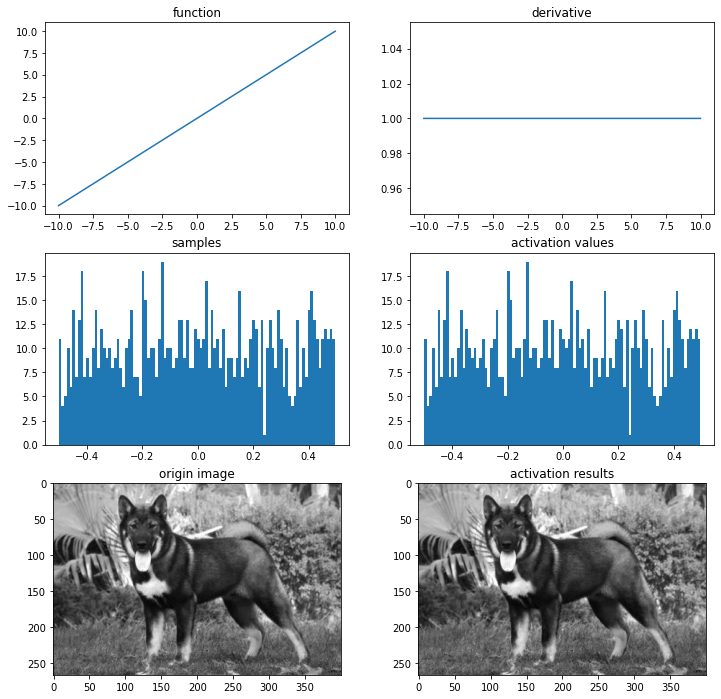

In [ ]:
img_path = '/content/dog.jpg'

# 선형 함수
def linear(x):
  return x

def dev_linear(x):
  return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

# 선형 활성화 함수를 사용한 모델은 그 이름에 걸맞게 선형적으로 구분 가능한 문제를 해결할 수 있습니다.

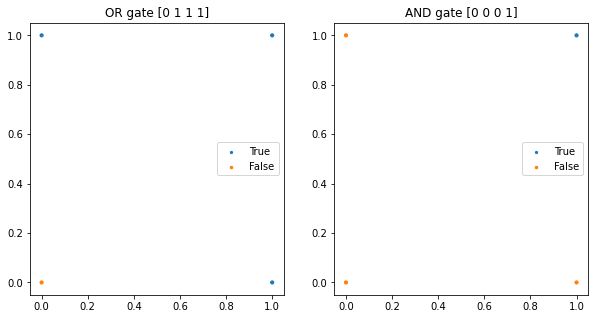

In [ ]:
# 선형 활성화 함수와 AND gate와 OR gate

# AND gate, OR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

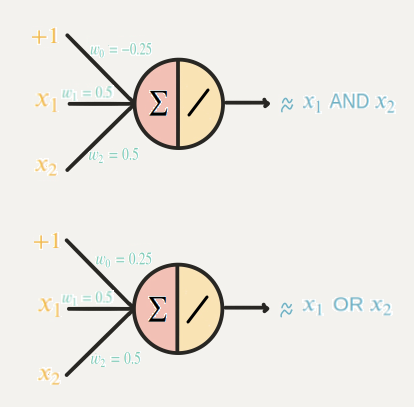

In [ ]:
import tensorflow as tf

# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=0)
and_linear_model.fit(X, and_y, epochs=1000, verbose=0)

done


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


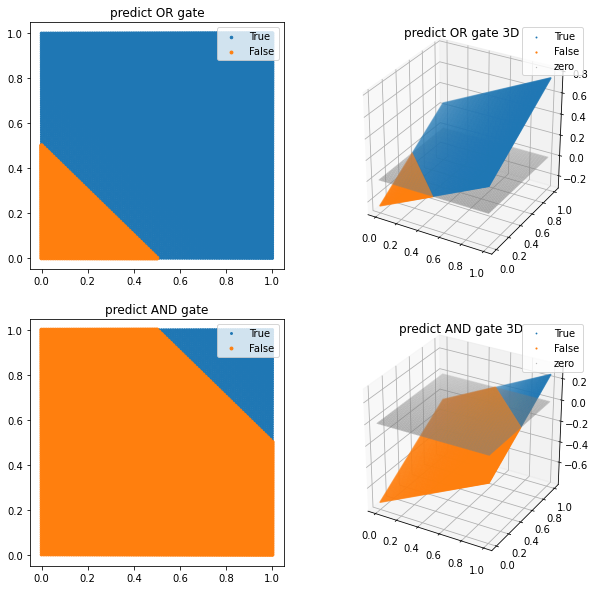

In [ ]:
# 그래프 시각화
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

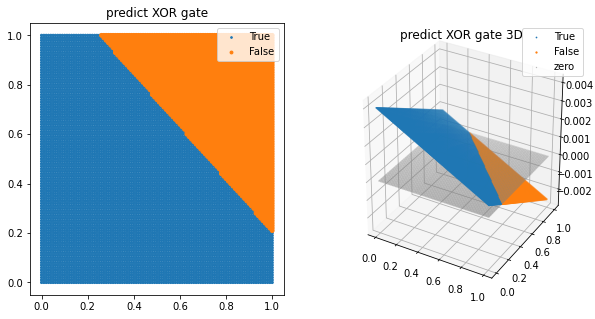

In [ ]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

# 이 모델로 XOR 게이트는 구현할 수 없다.
# 선 하나로 나눌 수 없기 때문이다.
# 선형 활성화 함수의 한계는 명확합니다. 
# 바로 모델에 선형 활성화 함수를 사용한다면 비선형적 특성을 지닌 데이터를 예측하지 못한다는 것입니다. 

# 23-9. 활성화 함수의 종류 (3) 비선형 활성화 함수-시그모이드, Softmax

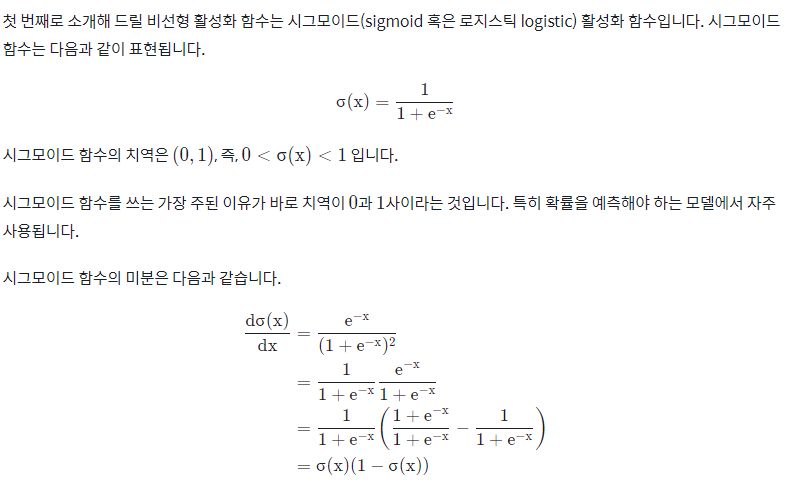

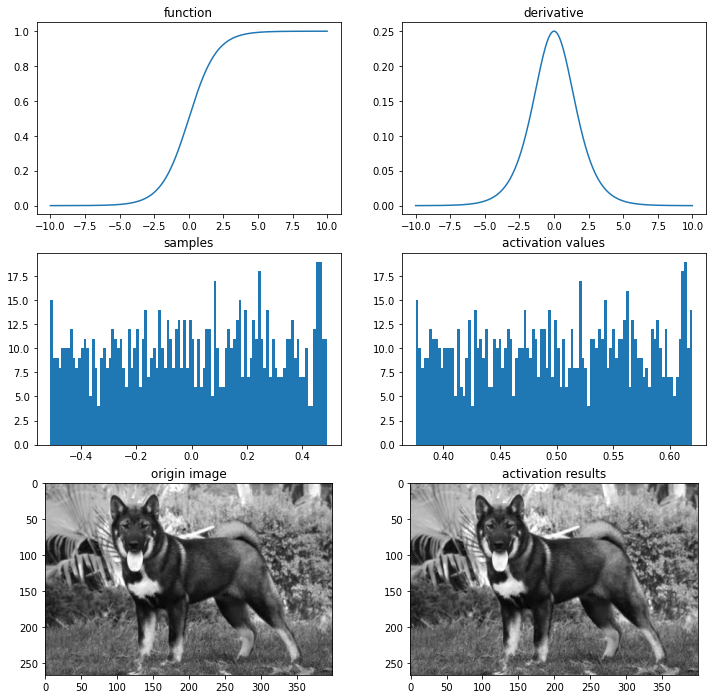

In [ ]:
img_path = '/content/dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

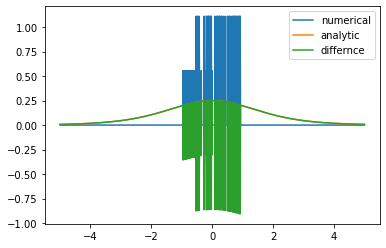

In [ ]:
# 수치 미분

def num_derivative(x, function):
  h = 1e-16 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
  numerator = function(x+h)-function(x)
  return numerator/h

# 두 그래프의 차이

diff_X = [-5 + x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

# 23-10. 활성화 함수의 종류 (4) 비선형 활성화 함수-하이퍼볼릭 탄젠트

- 하이퍼볼릭 탄젠트 함수의 치역은 (-1,1)(−1,1), 즉, -1<sigma(x)<1−1<σ(x)<1 입니다.

- 일반적으로 하이퍼볼릭 탄젠트 함수를 사용한 모델이 시그모이드 함수를 사용한 모델보다 더 빨리 훈련

- [tanh함수 미분 참고](http://taewan.kim/post/tanh_diff/)

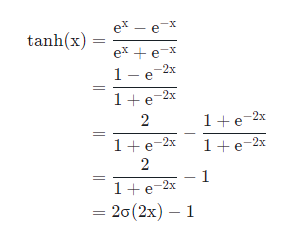

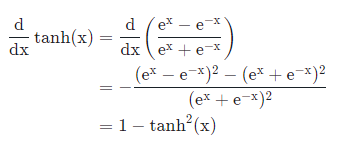

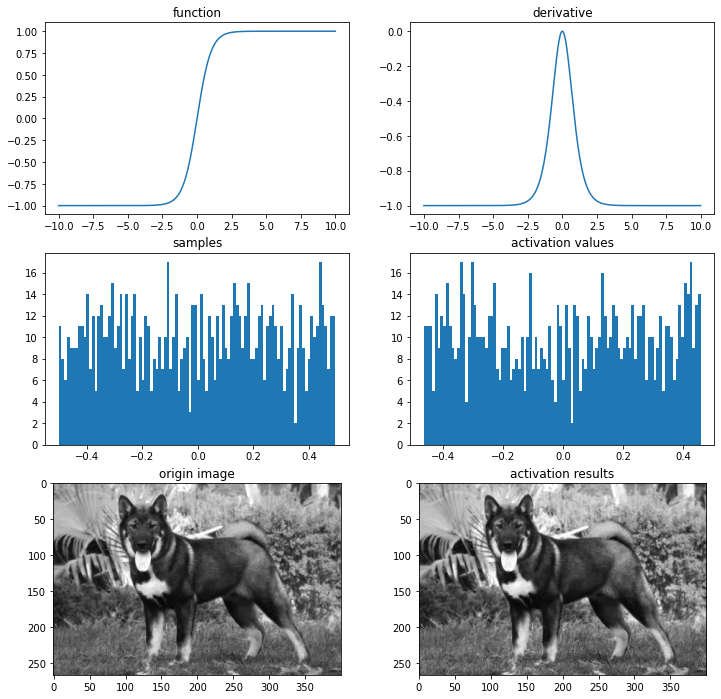

In [ ]:
img_path = '/content/dog.jpg'

# 시그모이드 함수
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def dev_tanh(x):
    return 1 - 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

# 23-11. 활성화 함수의 종류 (5) 비선형 활성화 함수-ReLU

- tanh(x)보다 처리 속도가 빠름

- 단점 :  Dying ReLU
- 이것의 의미는 모델에서 ReLU를 사용한 노드가 비활성화되며 출력을 00으로만 하게 되는 것입니다.
- 이전 훈련 스텝에서 이 노드의 가중치가 업데이트되어 \sum_i w_i x_i + b∑i wi xi+b가 가중치 ww값에 의해 입력값 xx에 상관없이 0이하로 나오게 되었다면, 이 이후의 업데이트에서는 그래디언트가 항상 0이 되어 가중치 업데이트가 일어나지 않게 됩니다. 즉, 이 노드의 출력값과 그래디언트가 0이 되어 노드가 죽어 버립니다. 이러한 문제는 특히 학습률(learning rate)을 크게 잡을 때 자주 발생합니다. 반대로 학습률을 줄여준다면 이 문제는 적게 발생합니다. 

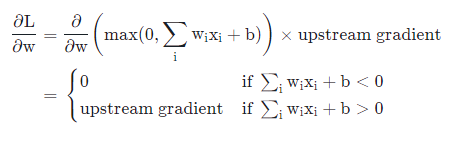

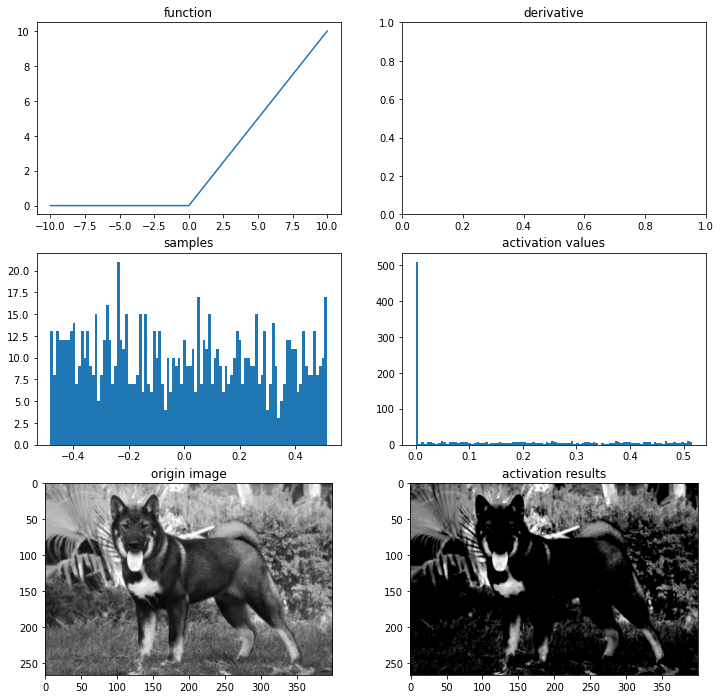

In [ ]:
img_path = '/content/dog.jpg'

# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

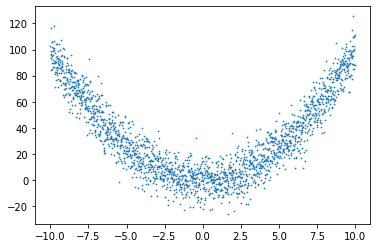

In [ ]:
# ReLU 함수가 비선형적 데이터의 특징을 잡는 이유

q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [ ]:
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 12        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 4         
                                                                 
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 

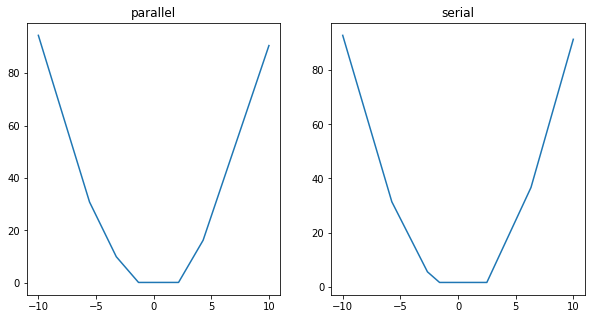

In [ ]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

# 23-12. 활성화 함수의 종류 (6) 비선형 활성화 함수-ReLU의 단점을 극복하기 위한 시도들

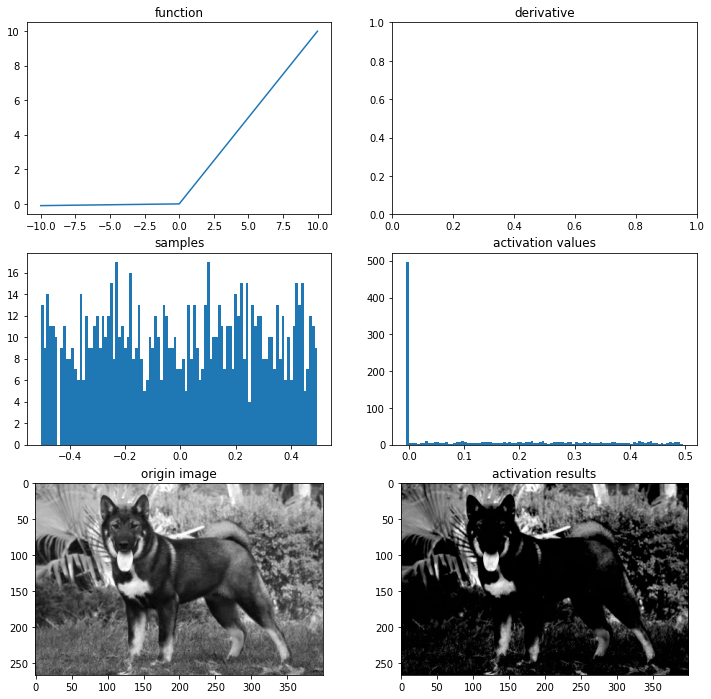

In [ ]:
# Leaky ReLU

img_path = '/content/dog.jpg'

# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

# 해결방법 : 'Dying ReLU'를 발생시켰던 0을 출력하던 부분을 아주 작은 음수값을 출력하게 만들어 주어 해당 문제를 해결

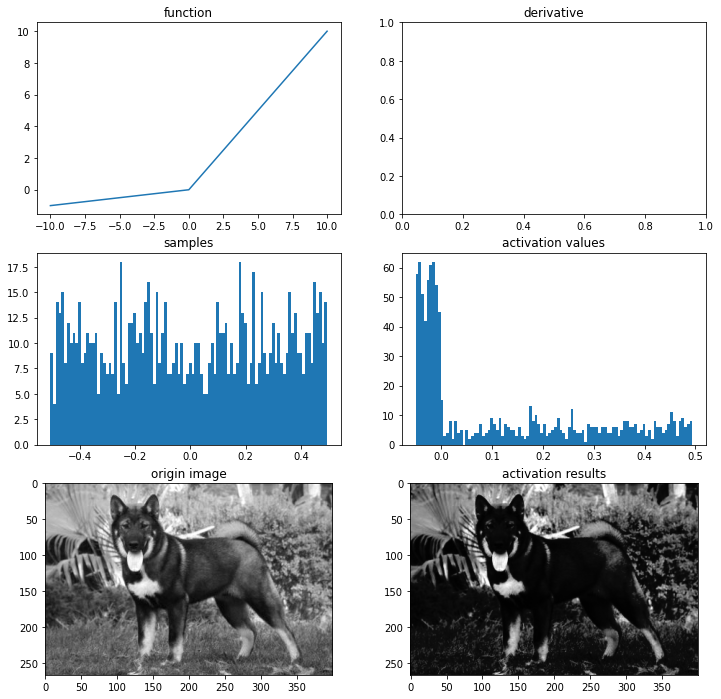

In [ ]:
# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

# 해결방법 : 새로운 파라미터를 추가하여 0 미만일 때의 '기울기'가 훈련되게 했습니다.

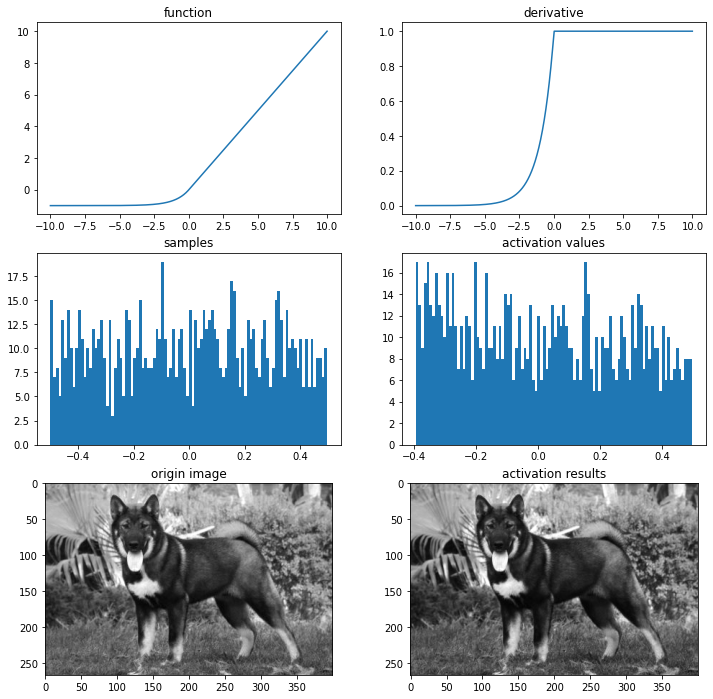

In [ ]:
# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()
# 해결방법 :  ReLU의 모든 장점을 포함하며, 0이 중심점이 아니었던 단점과, 'Dying ReLU'문제를 해결한 활성화 함수
